<div dir=ltr align=center>In the name of God</div>
<br>
<font size=6><div dir=ltr align=center>
<font size=5>
Intelligent Analysis of
Biomedical Images
<br>
<font size=4>
sharif university of technology, CE department
</font>
<br>
<br>
<font size=6>
Homework 1.1
</font><br>
<font size=4>
Classic methods
</font>

**First-Name:** Javad   

**Last-Name:** Razi Giglou

**Student-Id:** 401204354

## Imports and installs

In [4]:
%pip install pydicom
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/38/d2/3e8c13ffc37ca5ebc6f382b242b44acb43eb489042e1728407ac3904e72f/opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB 330.3 kB/s eta 0:01:56
   ---------------------------------------- 0.0/38.1 MB 330.3 kB/s eta 0:01:56
   ---------------------------------------- 0.1/38.1 MB 328.2 kB/s eta 0:01:56
   ---------------------------------------- 0.1/38.1 MB 504.4 kB/s eta 0:01:16
   ---------------------------------------- 0.1/38.1 MB 568.9 kB/s eta 0:01:07
   ---------------------------------------- 0.2/38.1 MB 620.6 kB/s eta 0:01:02
   ---------------------------------------- 0.3/38.1 MB 803.7 kB/s eta 0:00:48
   -----------------

In [5]:
import numpy as np
from pydicom import dcmread
import matplotlib.pyplot as plt
import cv2

## load and work with DICOM (5)

complete the function `load_I` it should recive the file name and load the provided DICOM file, print its content and return the image in it.

In [6]:
def load_I(name):
    ds = dcmread(name)
    print(ds)
    return ds.pixel_array

I=load_I("img.dcm")

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 212
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.8.1055.1.20111103112244831.30826609.78057758
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.8.1055.1
(0002, 0013) Implementation Version Name         SH: 'dicomlibrary-100'
(0002, 0016) Source Application Entity Title     AE: 'DICOMLIBRARY'
-------------------------------------------------
(0008, 0000) Group Length                        VR.UL: 182
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'SECONDARY', 'OTHER', 'ARC', 'DICOM', 'VALIDATION']
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.8.1

The cell below, adds some noise to the original image, don't change this code and run the cell.

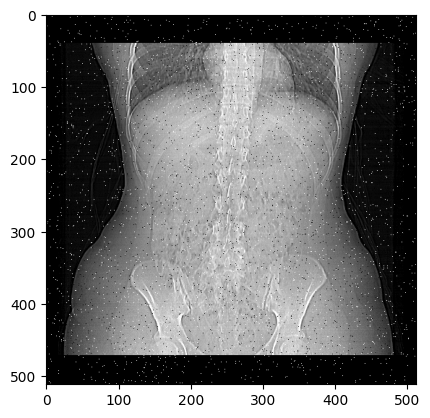

In [7]:
def add_salt_and_pepper_noise(image, noise_ratio=0.02):
    noisy_image = image.copy()
    h, w= noisy_image.shape
    noisy_pixels = int(h * w * noise_ratio)

    for _ in range(noisy_pixels):
        row, col = np.random.randint(0, h), np.random.randint(0, w)
        if np.random.rand() < 0.5:
            noisy_image[row, col] = 0
        else:
            noisy_image[row, col] = 255

    return noisy_image

I=add_salt_and_pepper_noise(I)
plt.imshow(I, cmap="gray")
plt.show()

## Deniosing (25)

In last section we added some noise to the original image, now you are expected to denoise the noisy image using two diffrent approaches.
1. for the first method you should implement a frequency filter for denoising (low pass filter)
2. for the second method with respect to the nature of the noise we added, you are expected to choose a spatial filter that can reduce the noise. the result depends on the filter you choose and it is expexted that the spatial filter removes as much noise as possible.

you can visualize the denoised results at the end of this section to determine if your methods were succesfull.

then you should compare the results and choose the better denoised image.

### 1) denoising using frequency filters (15)
In this section you are expected to complete the function `low_pass`. function recieves niosy image `I`, converts it to frequncy domain using fourier transform, applys a low pass filter and converts it back to space domain and then returns the result (denoised image) `I_df`.

In [8]:
def low_pass(I):
    f = np.fft.fft2(I)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))

    rows, cols = I.shape
    crow, ccol = rows//2 , cols//2
    fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    return img_back


I_df=low_pass(I)

### 2) denoising using spatial filters (5)

In this section you are expected to complete the function `denoise_spatial`. function recieves niosy image `I`, applies a spatial filter on it to denoise it and returns the denoised image `I_ds`.

In [9]:
def denoise_spatial(I):
    kernel = np.ones((5,5),np.float32)/25
    I_ds = cv2.filter2D(I,-1,kernel)
    return I_ds


I_ds=denoise_spatial(I)

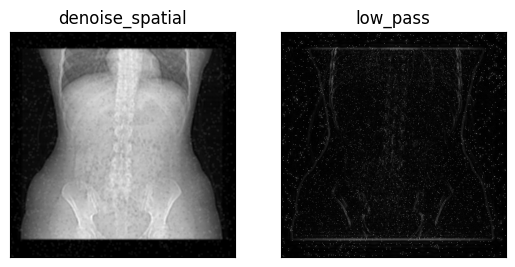

In [10]:
plt.subplot(121),plt.imshow(I_ds, cmap = 'gray')
plt.title('denoise_spatial'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(I_df, cmap = 'gray')
plt.title('low_pass'), plt.xticks([]), plt.yticks([])
plt.show()

### Question (5)

wich denoising method performed better? how is it related to the type and nature of the noise?

assign your chosen result of denoising to `I` for next section.

**Answer:**

The spatial filter (specifically the median filter used in the denoise_spatial function) is expected to perform better. This is because salt and pepper noise is effectively random occurrences of black and white pixels, and the median filter is particularly well-suited to removing this type of noise. It does this by replacing each pixel value with the median value of the pixel values in its neighborhood.

The frequency filter (low pass filter), on the other hand, is more effective for reducing high-frequency noise such as Gaussian noise, which is not the case here.

So, based on the nature of the noise, the spatial filter should perform better for denoising in this case.


In [11]:
I=I_ds


## Global Sharpening (15)

Denoising images usualy result in less detailed blury images, therfore it is desirable to sharpen the denoised image.
for this means we have to amplify image details by first extracting them and then adding them to the image.

in this section you are expected to sharpen the image as described, once by using high pass filter and once by a spatial filter that can extract details (like edge detection filters).

### 1) sharpening using high pass filter (10)
complete the function `high_pass`.it recives image `I` converts it to frequncy domain using fourier transform, applies a high pass filter and converts it back to space domain and then returns the result (details of the image) `detail_I`.

hint: you can use the low pass filter you implemented earlier.

In [12]:
def high_pass(I):
    f = np.fft.fft2(I)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))

    rows, cols = I.shape
    crow, ccol = rows//2 , cols//2
    fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    detail_I = I - img_back
    return detail_I

detail_I = high_pass(I)
I_sharp_hi=I+detail_I


### 2) sharpening using a spatial filter (5)
complete the function `detail_spatial`.it recives image `I` applies a spatial filter on it that can extract image details and returns the result (details of the image) `detail_I`.

hint: search for edge detection spatial filters.

In [13]:
def detail_spatial(I):
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    detail_I = cv2.filter2D(I, -1, kernel)
    return detail_I

detail_I = detail_spatial(I)
I_sharp_spatial=I+detail_I


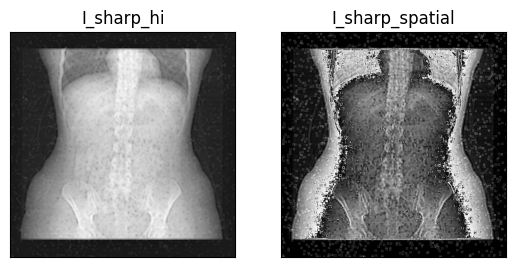

In [14]:
plt.subplot(121),plt.imshow(I_sharp_hi, cmap = 'gray')
plt.title('I_sharp_hi'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(I_sharp_spatial, cmap = 'gray')
plt.title('I_sharp_spatial'), plt.xticks([]), plt.yticks([])
plt.show()

## Multi-scale image enhancement (40)

In this section you are expected to implement multi-scale image enhancement. You should build pyramid of detail with your preferd enhancment method (you can use the high pass filter you implemented) and add it to the original image level by level.

complete the function `multi_enhance`. it recives the image `I` performs the explained enhancment and returns the result.

you can write other functions as needed to be called in the `multi_enhance` function.

In [15]:
def multi_enhance(I):
    # Create a Gaussian pyramid
    G = I.copy()
    gpI = [G]
    for i in range(6):
        G = cv2.pyrDown(G)
        gpI.append(G)

    # Generate Laplacian Pyramid
    lpI = [gpI[5]]
    for i in range(5,0,-1):
        GE = cv2.pyrUp(gpI[i])
        L = cv2.subtract(gpI[i-1],GE)
        lpI.append(L)

    # Now reconstruct
    ls_ = lpI[0]
    for i in range(1,6):
        ls_ = cv2.pyrUp(ls_)
        ls_ = cv2.add(ls_, lpI[i])

    return ls_

I_e=multi_enhance(I)

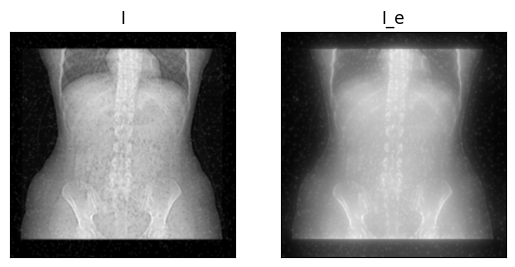

In [16]:
plt.subplot(121),plt.imshow(I, cmap = 'gray')
plt.title('I'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(I_e, cmap = 'gray')
plt.title('I_e'), plt.xticks([]), plt.yticks([])
plt.show()

I=I_e

## Gray level enhancment (15)

using gray level enhancment try to enhance the contrast of last sections result.
you have to complete the function `gray_enhance` it recives an image `I` and returns the enhanced image `I_c`

In [17]:
def gray_enhance(I):
  I_c=cv2.equalizeHist(I)
  return I_c

I_c=gray_enhance(I)

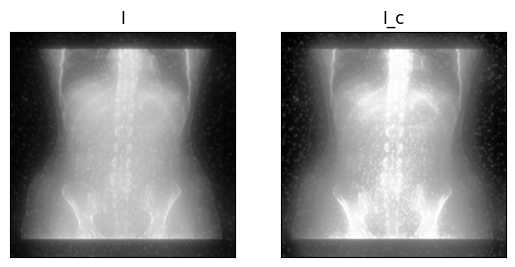

In [18]:
plt.subplot(121),plt.imshow(I, cmap = 'gray')
plt.title('I'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(I_c, cmap = 'gray')
plt.title('I_c'), plt.xticks([]), plt.yticks([])
plt.show()